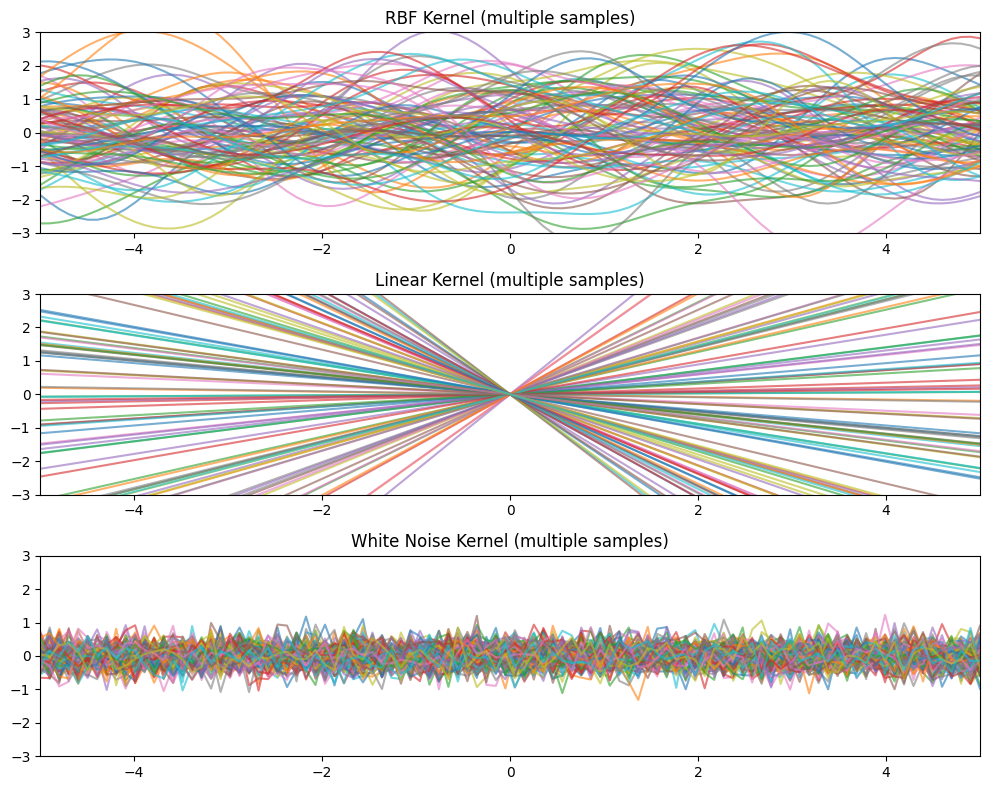

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 1) Define some kernels -----

def rbf_kernel(x1, x2, lengthscale=1.0, sigma_f=1.0):
    """RBF (squared exponential) kernel."""
    x1 = x1[:, None]
    x2 = x2[None, :]
    sqdist = (x1 - x2)**2
    return sigma_f**2 * np.exp(-0.5 * sqdist / lengthscale**2)

def linear_kernel(x1, x2, alpha=1.0):
    """Simple linear kernel: k(x1, x2) = alpha * x1 * x2."""
    x1 = x1[:, None]
    x2 = x2[None, :]
    return alpha * (x1 * x2)

def white_noise_kernel(x1, x2, sigma2=1e-1):
    """White noise kernel: k(x1, x2) = sigma2 * delta(x1-x2)."""
    # delta(x1-x2) is 1 if x1 == x2, else 0
    # We'll implement it by checking if the indices match
    n1 = len(x1)
    n2 = len(x2)
    K = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            if np.isclose(x1[i], x2[j]):
                K[i, j] = sigma2
    return K

# ----- 2) Choose a set of input points -----
X = np.linspace(-5, 5, 100)

# ----- 3) Build different kernels and sample from each -----
kernels = {
    'RBF': rbf_kernel,
    'Linear': linear_kernel,
    'White Noise': white_noise_kernel
}

num_samples = 100  # how many samples per kernel

plt.figure(figsize=(10, 8))

for i, (name, kernel_func) in enumerate(kernels.items(), 1):
    # Compute covariance matrix
    K = kernel_func(X, X)
    
    # Mean is zero
    mean = np.zeros(len(X))
    
    # Plot each draw on the same subplot
    plt.subplot(len(kernels), 1, i)
    for s in range(num_samples):
        f_sample = np.random.multivariate_normal(mean, K)
        plt.plot(X, f_sample, label=f'{name} sample {s+1}', alpha=0.6)
    
    plt.title(name + ' Kernel (multiple samples)')
    plt.xlim([-5, 5])
    plt.ylim([-3, 3])
    #plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
e^a + e^b = e^a +b 